In [1]:
import os
import json

# datasets 폴더 경로 설정
datasets_folder = 'Mut_datasets'

# 폴더 내 모든 파일 이름 가져오기
files = [f for f in os.listdir(datasets_folder) if f.endswith('.json')]

def calculate_averages(data, dataset):
    metrics = ['Log Loss', 'AUC', 'Accuracy', 'F1']
    averages = {}
    for metric in metrics:
        averages[metric] = sum(data[dataset][metric]) / len(data[dataset][metric])
    return averages

# 모든 파일에 대해 처리
for input_filename in files:
    input_filepath = os.path.join(datasets_folder, input_filename)
    
    # JSON 파일 로드
    with open(input_filepath, 'r') as file:
        data = json.load(file)
    
    # 필요한 데이터셋 정보와 성능만 추출
    dataset_name = data['dataset']['name']
    performance_metrics = data['scorers']
    train_times = data['timers']['train']
    
    # Training time 계산
    average_train_time = sum(train_times) / len(train_times)
    
    # 성능 지표 계산
    train_averages = calculate_averages(performance_metrics, 'train')
    val_averages = calculate_averages(performance_metrics, 'val')
    test_averages = calculate_averages(performance_metrics, 'test')
    
    # 결과 구조화
    averages_result = {
        "train_averages": train_averages,
        "val_averages": val_averages,
        "test_averages": test_averages,
        "average_train_time": average_train_time
    }
    
    # 최종 결과 통합
    final_result = {
        "dataset_name": dataset_name,
        "averages": averages_result
    }
    
    # 출력 파일 이름 설정
    output_filename = os.path.splitext(input_filename)[0] + '_results.json'
    output_filepath = os.path.join(datasets_folder, output_filename)
    
    # JSON 파일로 저장
    with open(output_filepath, 'w') as file:
        json.dump(final_result, file, indent=4)
    
    print(f"Results saved to {output_filepath}")


Results saved to Mut_datasets\albert_results.json
Results saved to Mut_datasets\artificial_results.json
Results saved to Mut_datasets\Austrailian_results.json
Results saved to Mut_datasets\balance-scale_results.json
Results saved to Mut_datasets\Bio_results.json
Results saved to Mut_datasets\cnae_results.json
Results saved to Mut_datasets\colic_25_results.json
Results saved to Mut_datasets\colic_27_results.json
Results saved to Mut_datasets\credit-approval_results.json
Results saved to Mut_datasets\credit-g_results.json
Results saved to Mut_datasets\electricity_results.json
Results saved to Mut_datasets\elevators_results.json
Results saved to Mut_datasets\GPSP_results.json
Results saved to Mut_datasets\guillermo_results.json
Results saved to Mut_datasets\hearth-h_results.json
Results saved to Mut_datasets\higgs_results.json
Results saved to Mut_datasets\jasmine_results.json
Results saved to Mut_datasets\jungle_results.json
Results saved to Mut_datasets\kc1_results.json
Results saved to

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Dataset: openml__jasmine__168911
  Train Averages:
    Training Time (s):
      Original: 3.68805
      RF: 0.00092
      Difference: -3.68713


Dataset: openml__mfeat-fourier__14
  Train Averages:
    Training Time (s):
      Original: 1.05577
      RF: 0.00048
      Difference: -1.05530


Dataset: openml__artificial-characters__14964
  Train Averages:
    Training Time (s):
      Original: 1.01767
      RF: 0.00051
      Difference: -1.01717


Dataset: openml__qsar-biodeg__9957
  Train Averages:
    Training Time (s):
      Original: 0.87481
      RF: 0.00038
      Difference: -0.87443


Dataset: openml__electricity__219
  Train Averages:
    Training Time (s):
      Original: 0.73643
      RF: 0.00112
      Difference: -0.73531


Dataset: openml__credit-approval__29
  Train Averages:
    Training Time (s):
      Original: 1.12363
      RF: 0.00061
      Difference: -1.12302


Dataset: openml__profb__3561
  Train Averages:
    Training Time (s):
      Original: 1.07733
      RF: 0.00

C:\Users\rkdal\AppData\Local\Temp\ipykernel_27544\2408154314.py:93: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


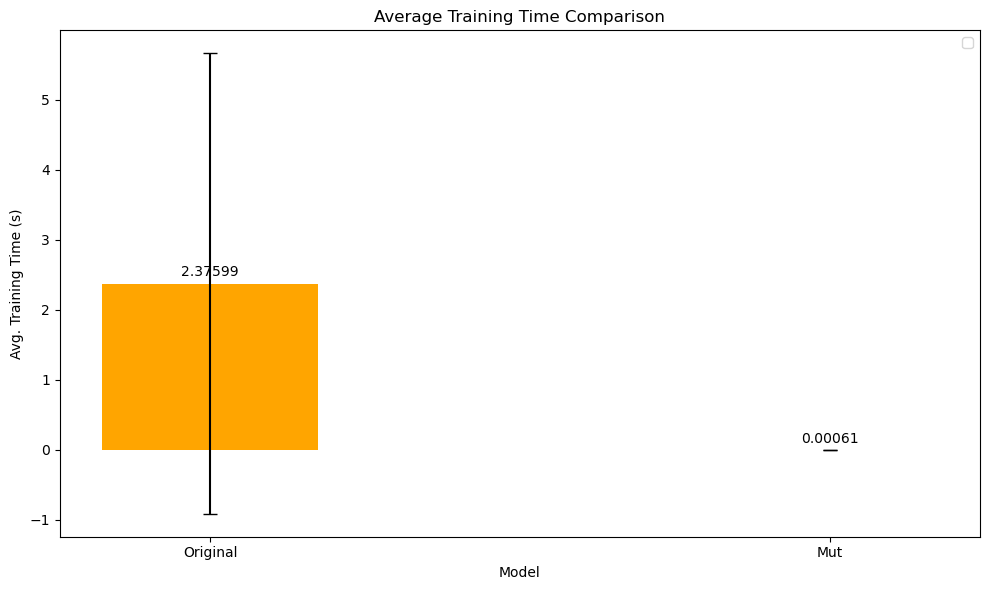

Comparison results saved to c:\Users\rkdal\OneDrive - 고려대학교\바탕 화면\대외활동\개인적인 학습\pythonpoject\tabzila\CatBoost_datasets\comparison_results.json


In [8]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

def load_json(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)

def compare_results(dataset_folder, RF_folder):
    dataset_files = set(os.listdir(dataset_folder))
    RF_files = set(os.listdir(RF_folder))
    
    common_files = dataset_files.intersection(RF_files)
    
    results = {}
    
    for file_name in common_files:
        if file_name.endswith('_results.json'):
            dataset_file_path = os.path.join(dataset_folder, file_name)
            RF_file_path = os.path.join(RF_folder, file_name)
            
            dataset_data = load_json(dataset_file_path)
            RF_data = load_json(RF_file_path)
            
            try:
                dataset_name = dataset_data['dataset_name']
                dataset_train_time = dataset_data['averages']['average_train_time']
                RF_train_time = RF_data['averages']['average_train_time']
                
                results[dataset_name] = {
                    "train_averages": {
                        "original": dataset_train_time,
                        "RF": RF_train_time
                    }
                }
            except KeyError as e:
                print(f"KeyError: {e} in file {file_name}")
                continue
    
    return results

def plot_comparison(results):
    if not results:
        print("No data to plot.")
        return
    
    datasets = list(results.keys())
    datasets.sort()
    original_train_times = [results[dataset]['train_averages']['original'] for dataset in datasets]
    RF_train_times = [results[dataset]['train_averages']['RF'] for dataset in datasets]

    if not original_train_times or not RF_train_times:
        print("No training times available for comparison.")
        return

    # 각 모델의 평균 학습 시간 계산
    mean_original_train_time = np.mean(original_train_times)
    mean_RF_train_time = np.mean(RF_train_times)
    
    # 소수점 아래 5자리까지 표시
    mean_original_train_time = round(mean_original_train_time, 5)
    mean_RF_train_time = round(mean_RF_train_time, 5)
    
    # 그래프 생성용 데이터
    labels = ['Original', 'Mut']
    means = [mean_original_train_time, mean_RF_train_time]
    errors = [round(np.std(original_train_times), 5), round(np.std(RF_train_times), 5)]  # 표준 편차를 오차 막대로 사용

    x = np.arange(len(labels))
    width = 0.35

    fig, ax = plt.subplots(figsize=(10, 6), constrained_layout=True)
    bars = ax.bar(x, means, width, yerr=errors, capsize=5, color=['orange', 'blue'])

    # 막대에 수치 표시
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.5f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

    # 그래프 설정
    ax.set_xlabel('Model')
    ax.set_ylabel('Avg. Training Time (s)')
    ax.set_title('Average Training Time Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    fig.tight_layout()

    # 그래프 출력
    plt.show()

def main():
    dataset_folder = 'CatBoost_datasets'
    RF_folder = 'Mut_datasets'
    
    comparison_results = compare_results(dataset_folder, RF_folder)
    
    if comparison_results:
        for dataset, metrics in comparison_results.items():
            original_time = metrics['train_averages']['original']
            RF_time = metrics['train_averages']['RF']
            difference = RF_time - original_time
            print(f"Dataset: {dataset}")
            print("  Train Averages:")
            print(f"    Training Time (s):")
            print(f"      Original: {original_time:.5f}")
            print(f"      RF: {RF_time:.5f}")
            print(f"      Difference: {difference:.5f}")
            print("\n")
        
        # 결과를 그래프로 표현
        plot_comparison(comparison_results)
        
        # 결과를 JSON 파일로 저장
        output_filepath = os.path.join(os.path.abspath(dataset_folder), 'comparison_results.json')
        with open(output_filepath, 'w') as file:
            json.dump(comparison_results, file, indent=4)
        
        print(f"Comparison results saved to {output_filepath}")
    else:
        print("No comparison results to save.")

if __name__ == "__main__":
    main()


In [7]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

def load_json(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)

def compare_results(dataset_folder, RF_folder):
    dataset_files = set(os.listdir(dataset_folder))
    RF_files = set(os.listdir(RF_folder))
    
    common_files = dataset_files.intersection(RF_files)
    
    results = {}
    
    for file_name in common_files:
        if file_name.endswith('_results.json'):
            dataset_file_path = os.path.join(dataset_folder, file_name)
            RF_file_path = os.path.join(RF_folder, file_name)
            
            dataset_data = load_json(dataset_file_path)
            RF_data = load_json(RF_file_path)
            
            try:
                dataset_name = dataset_data['dataset_name']
                dataset_train_time = dataset_data['averages']['average_train_time']
                RF_train_time = RF_data['averages']['average_train_time']
                
                results[dataset_name] = {
                    "train_averages": {
                        "original": dataset_train_time,
                        "RF": RF_train_time
                    }
                }
            except KeyError as e:
                print(f"KeyError: {e} in file {file_name}")
                continue
    
    return results

def plot_comparison(results):
    if not results:
        print("No data to plot.")
        return
    
    datasets = list(results.keys())
    datasets.sort()
    original_train_times = [results[dataset]['train_averages']['original'] for dataset in datasets]
    RF_train_times = [results[dataset]['train_averages']['RF'] for dataset in datasets]

    if not original_train_times or not RF_train_times:
        print("No training times available for comparison.")
        return

    # 각 모델의 평균 학습 시간 계산
    mean_original_train_time = np.mean(original_train_times)
    mean_RF_train_time = np.mean(RF_train_times)
    
    # 소수점 아래 5자리까지 표시
    mean_original_train_time = round(mean_original_train_time, 5)
    mean_RF_train_time = round(mean_RF_train_time, 5)
    
    # 그래프 생성용 데이터
    labels = ['Original', 'Mut']
    means = [mean_original_train_time, mean_RF_train_time]
    errors = [round(np.std(original_train_times), 5), round(np.std(RF_train_times), 5)]  # 표준 편차를 오차 막대로 사용

    x = np.arange(len(labels))
    width = 0.35

    fig, ax = plt.subplots(figsize=(10, 6), constrained_layout=True)
    bars = ax.bar(x, means, width, yerr=errors, capsize=5, color=['orange', 'blue'])

    # 막대에 수치 표시
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.5f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

    # 그래프 설정
    ax.set_xlabel('Model')
    ax.set_ylabel('Avg. Training Time (s)')
    ax.set_title('Average Training Time Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    fig.tight_layout()

    # 그래프 출력
    plt.show()

def main():
    dataset_folder = 'CatBoost_datasets'
    RF_folder = 'Mut_datasets'
    
    comparison_results = compare_results(dataset_folder, RF_folder)
    
    if comparison_results:
        for dataset, metrics in comparison_results.items():
            original_time = metrics['train_averages']['original']
            RF_time = metrics['train_averages']['RF']
            difference = RF_time - original_time
            print(f"Dataset: {dataset}")
            print("  Train Averages:")
            print(f"    Training Time (s):")
            print(f"      Original: {original_time:.5f}")
            print(f"      RF: {RF_time:.5f}")
            print(f"      Difference: {difference:.5f}")
            print("\n")
        
        # 결과를 그래프로 표현
        plot_comparison(comparison_results)
        
        # 결과를 JSON 파일로 저장
        output_filepath = os.path.join(os.path.abspath(dataset_folder), 'comparison_results.json')
        with open(output_filepath, 'w') as file):
            json.dump(comparison_results, file, indent=4)
        
        print(f"Comparison results saved to {output_filepath}")
    else:
        print("No comparison results to save.")

if __name__ == "__main__":
    main()


SyntaxError: unmatched ')' (2142997811.py, line 122)

In [47]:
# Convert to pandas DataFrame
df = pd.DataFrame(data)

# Encode categorical features if any
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Separate features and target
X = df.drop(columns='binaryClass')
y = df['binaryClass']

# Calculate minimum target class frequency
min_class_frequency = y.value_counts(normalize=True).min()
print("Minimum Target Class Frequency:", min_class_frequency)

Minimum Target Class Frequency: 0.22145328719723184
